In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Settings
np.random.seed(42)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Imports done")


✓ Imports done


In [7]:
# Load the India Road Accident dataset
df = pd.read_csv('C:\\Users\\LOQ\\traffic-accident\\data\\accident_prediction_india.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Rows: {df.shape[0]:,} | Columns: {df.shape[1]}")
print("\n" + "="*60)
df.head()


Dataset Shape: (3000, 22)
Rows: 3,000 | Columns: 22



,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,Number of Fatalities,Weather Conditions,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,4,Hazy,National Highway,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,4,Hazy,Urban Road,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,5,Foggy,National Highway,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,5,Rainy,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,1,Foggy,Urban Road,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection


In [8]:
# Check all column names
print("Column Names:")
print("-" * 60)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n" + "="*60)
print("\nDataset Info:")
print("-" * 60)
df.info()


Column Names:
------------------------------------------------------------
 1. State Name
 2. City Name
 3. Year
 4. Month
 5. Day of Week
 6. Time of Day
 7. Accident Severity
 8. Number of Vehicles Involved
 9. Vehicle Type Involved
10. Number of Casualties
11. Number of Fatalities
12. Weather Conditions
13. Road Type
14. Road Condition
15. Lighting Conditions
16. Traffic Control Presence
17. Speed Limit (km/h)
18. Driver Age
19. Driver Gender
20. Driver License Status
21. Alcohol Involvement
22. Accident Location Details


Dataset Info:
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State Name                   3000 non-null   object
 1   City Name                    3000 non-null   object
 2   Year                         3000 non-null   int64 
 

In [9]:
# Missing values
missing = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

print("Missing Values Summary:")
print("="*60)
if len(missing) > 0:
    print(missing.to_string(index=False))
else:
    print("✓ No missing values found!")


Missing Values Summary:
                  Column  Missing_Count  Missing_Percentage
   Driver License Status            975               32.50
Traffic Control Presence            716               23.87


In [10]:
# Check for common severity/target column names
target_cols = [col for col in df.columns if 'severity' in col.lower() or 
               'accident' in col.lower() or 'casualt' in col.lower() or 
               'fatal' in col.lower()]

print("Potential Target Columns:")
print("-" * 60)
for col in target_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")


Potential Target Columns:
------------------------------------------------------------

Accident Severity:
Accident Severity
Minor      1034
Fatal       985
Serious     981
Name: count, dtype: int64
Unique values: 3

Number of Casualties:
Number of Casualties
8     304
10    293
9     285
1     285
2     283
5     282
0     270
7     255
6     252
3     251
4     240
Name: count, dtype: int64
Unique values: 11

Number of Fatalities:
Number of Fatalities
0    530
3    511
1    509
5    494
2    485
4    471
Name: count, dtype: int64
Unique values: 6

Accident Location Details:
Accident Location Details
Intersection     789
Bridge           765
Straight Road    740
Curve            706
Name: count, dtype: int64
Unique values: 4


In [11]:
# Numerical columns statistics
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"Numerical Columns ({len(numeric_cols)}):")
print("="*60)
df[numeric_cols].describe().T


Numerical Columns (6):


,count,mean,std,min,25%,50%,75%,max
Year,3000.0,2020.530000,1.683858,2018.0,2019.0,2021.0,2022.0,2023.0
Number of Vehicles Involved,3000.0,2.996000,1.428285,1.0,2.0,3.0,4.0,5.0
Number of Casualties,3000.0,5.066000,3.214097,0.0,2.0,5.0,8.0,10.0
Number of Fatalities,3000.0,2.455333,1.717650,0.0,1.0,2.0,4.0,5.0
Speed Limit (km/h),3000.0,74.940667,26.765088,30.0,51.0,75.0,99.0,120.0
Driver Age,3000.0,44.177000,15.402860,18.0,31.0,45.0,57.0,70.0


In [12]:
# Categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Categorical Columns ({len(categorical_cols)}):")
print("="*60)

for col in categorical_cols[:10]:  # First 10 only
    print(f"\n{col}:")
    print(df[col].value_counts().head(5))
    print(f"Total unique: {df[col].nunique()}")


Categorical Columns (16):

State Name:
State Name
Goa                  109
Delhi                108
Sikkim               108
Uttarakhand          106
Jammu and Kashmir    105
Name: count, dtype: int64
Total unique: 32

City Name:
City Name
Unknown      2138
New Delhi      39
Lucknow        38
Dwarka         38
Surat          38
Name: count, dtype: int64
Total unique: 28

Month:
Month
March       266
June        262
October     261
December    260
January     256
Name: count, dtype: int64
Total unique: 12

Day of Week:
Day of Week
Wednesday    468
Thursday     438
Monday       427
Friday       423
Sunday       423
Name: count, dtype: int64
Total unique: 7

Time of Day:
Time of Day
8:34     7
3:40     7
18:24    7
14:16    7
0:37     6
Name: count, dtype: int64
Total unique: 1263

Accident Severity:
Accident Severity
Minor      1034
Fatal       985
Serious     981
Name: count, dtype: int64
Total unique: 3

Vehicle Type Involved:
Vehicle Type Involved
Truck            449
Auto-Rickshaw   

✓ Plot saved as: models/eda_plots.png


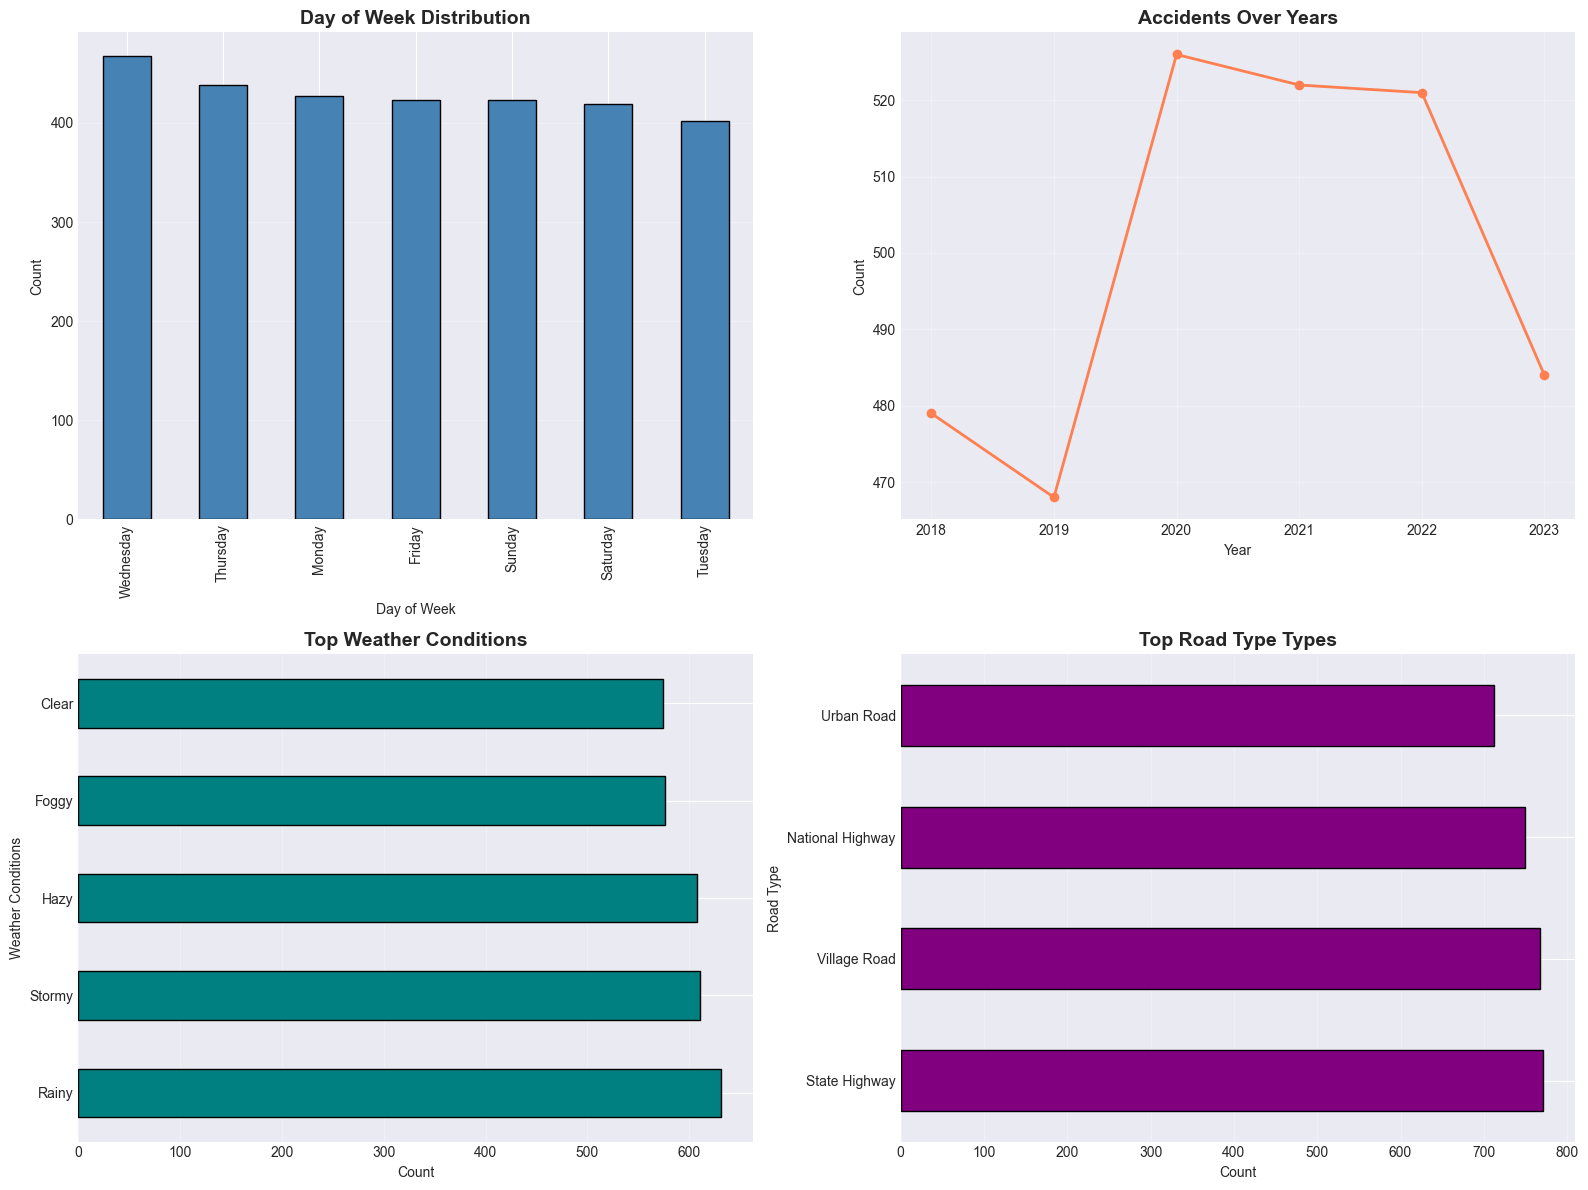

In [13]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Severity/Target distribution (adapt to your column name)
# Try to find the right column
if 'Accident_Severity' in df.columns:
    target_col = 'Accident_Severity'
elif 'Severity' in df.columns:
    target_col = 'Severity'
elif 'Casualty_Severity' in df.columns:
    target_col = 'Casualty_Severity'
else:
    # Use first categorical with few unique values
    target_col = [c for c in categorical_cols if df[c].nunique() < 10][0]

df[target_col].value_counts().plot(kind='bar', ax=axes[0,0], color='steelblue', edgecolor='black')
axes[0,0].set_title(f'{target_col} Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel(target_col)
axes[0,0].set_ylabel('Count')
axes[0,0].grid(axis='y', alpha=0.3)

# Plot 2: Time-based pattern (if date/time column exists)
time_cols = [c for c in df.columns if 'date' in c.lower() or 'time' in c.lower() or 'year' in c.lower()]
if time_cols:
    time_col = time_cols[0]
    if 'year' in time_col.lower():
        df[time_col].value_counts().sort_index().plot(kind='line', ax=axes[0,1], 
                                                       color='coral', marker='o', linewidth=2)
        axes[0,1].set_title('Accidents Over Years', fontsize=14, fontweight='bold')
    else:
        try:
            df_temp = df.copy()
            df_temp[time_col] = pd.to_datetime(df_temp[time_col], errors='coerce')
            df_temp['year'] = df_temp[time_col].dt.year
            df_temp['year'].value_counts().sort_index().plot(kind='line', ax=axes[0,1], 
                                                             color='coral', marker='o', linewidth=2)
            axes[0,1].set_title('Accidents Over Years', fontsize=14, fontweight='bold')
        except:
            axes[0,1].text(0.5, 0.5, 'No valid time data', ha='center', va='center')
    axes[0,1].set_xlabel('Year')
    axes[0,1].set_ylabel('Count')
    axes[0,1].grid(alpha=0.3)
else:
    axes[0,1].text(0.5, 0.5, 'No time column found', ha='center', va='center')

# Plot 3: Weather condition (if exists)
weather_cols = [c for c in df.columns if 'weather' in c.lower()]
if weather_cols:
    weather_col = weather_cols[0]
    df[weather_col].value_counts().head(8).plot(kind='barh', ax=axes[1,0], 
                                                 color='teal', edgecolor='black')
    axes[1,0].set_title(f'Top Weather Conditions', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Count')
    axes[1,0].grid(axis='x', alpha=0.3)
else:
    axes[1,0].text(0.5, 0.5, 'No weather column found', ha='center', va='center')

# Plot 4: Road/Location type (if exists)
road_cols = [c for c in df.columns if 'road' in c.lower() or 'location' in c.lower() or 'area' in c.lower()]
if road_cols:
    road_col = road_cols[0]
    df[road_col].value_counts().head(8).plot(kind='barh', ax=axes[1,1], 
                                             color='purple', edgecolor='black')
    axes[1,1].set_title(f'Top {road_col} Types', fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('Count')
    axes[1,1].grid(axis='x', alpha=0.3)
else:
    axes[1,1].text(0.5, 0.5, 'No road/location column found', ha='center', va='center')

plt.tight_layout()
plt.savefig('../models/eda_plots.png', dpi=120, bbox_inches='tight')
print("✓ Plot saved as: models/eda_plots.png")
plt.show()


✓ Correlation matrix saved


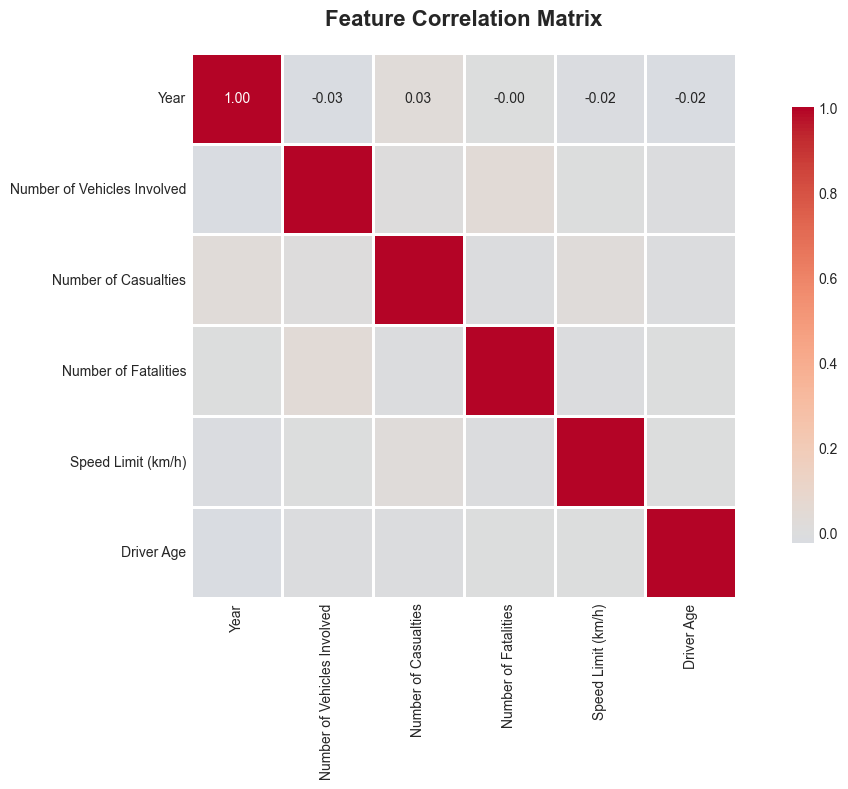

In [14]:
# Correlation heatmap
if len(numeric_cols) > 1:
    plt.figure(figsize=(12, 8))
    
    # Calculate correlation
    corr = df[numeric_cols].corr()
    
    # Plot heatmap
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, 
                cbar_kws={"shrink": 0.8})
    
    plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('../models/correlation_matrix.png', dpi=120, bbox_inches='tight')
    print("✓ Correlation matrix saved")
    plt.show()
else:
    print("Not enough numeric columns for correlation")


In [15]:
# Summary insights
print("="*70)
print("KEY INSIGHTS FROM DATA EXPLORATION".center(70))
print("="*70)

print(f"\n1. Dataset Size: {df.shape[0]:,} accidents, {df.shape[1]} features")
print(f"2. Date Range: {df[time_cols[0]].min() if time_cols else 'N/A'} to {df[time_cols[0]].max() if time_cols else 'N/A'}")
print(f"3. Target Variable: {target_col} with {df[target_col].nunique()} classes")
print(f"4. Missing Data: {missing.shape[0] if len(missing) > 0 else 0} columns have missing values")
print(f"5. Categorical Features: {len(categorical_cols)}")
print(f"6. Numerical Features: {len(numeric_cols)}")

print("\n" + "="*70)
print("✓ Data Exploration Complete!")
print("="*70)


                  KEY INSIGHTS FROM DATA EXPLORATION                  

1. Dataset Size: 3,000 accidents, 22 features
2. Date Range: 2018 to 2023
3. Target Variable: Day of Week with 7 classes
4. Missing Data: 2 columns have missing values
5. Categorical Features: 16
6. Numerical Features: 6

✓ Data Exploration Complete!
